<font size="6">**Project definition**</font>

In this projetc, I train and fine-tune a classifier (decision tree and random forest) for the moons dataset by taking the following steps:
1) use make_moons(n_samples=10000,noise=0.4) to generate a moons dataset
2) use train_test_split() to split the dataset into a training and testing set
3) use grid search with cross_validation (gridsearchcv) to find good hyperparameter values for the decisiontreeclassifier.
   
Hint: try various values for max_leaf_nodes

<font size="6">**Decision Tree**</font>

<font size="5">**1. Import required libraries**</font>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<font size="5">**2. Split the dataset into training and testing sets**</font>

In [83]:
# Step 1: Generate the Moons dataset
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font size="5">**3. Trian and test a Decision Tree classifier**</font>

In [7]:
# Step 3: Define the parameter grid for GridSearchCV
param_grid = {
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

# Step 4: Initialize DecisionTreeClassifier and GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1)

# Step 5: Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Step 6: Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Step 7: Evaluate the best model on the test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy of best model: {:.2f}".format(test_accuracy))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best parameters found:  {'max_leaf_nodes': 20}
Best cross-validation accuracy: 0.86
Test set accuracy of best model: 0.87


<font size="5">**4. Plot decision boundary**</font>

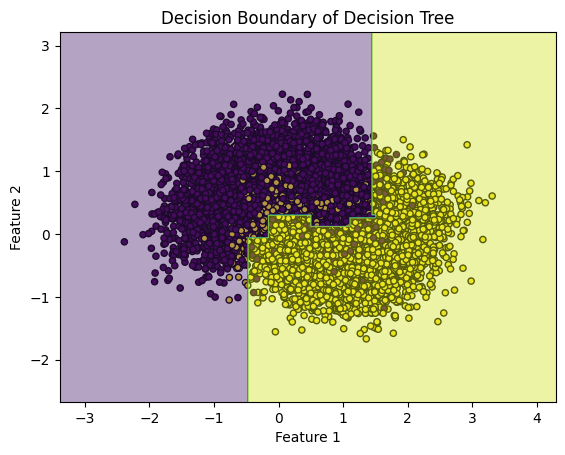

In [81]:
# Function to plot decision boundary
def plot_decision_boundary(clf, X, y):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=20)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Decision Tree')
    plt.show()

# Plot decision boundary
plot_decision_boundary(best_dt, X, y)

<font size="6">**Random Forest**</font>

Grow a forest by following steps:
1) In this section, 1000 subsets of the training set are generated, each containing 100 instances selected randomly.
   
Hint: Use Scikit_learns's ShuffleSplit class for this

3) Train one decision tree on each subset, using the best hyperparameter values found in the previous section. 
Evaluate these 1000 decision trees on the test set. Since they were trained on smaller sets, these decision trees will likely 
perform worse than the first decision tree.

5) For each test set instance, generate the predictions of the 1000 decision trees, and keep only the most frequent prediciton.
(I will use scipy's mode() function). This approach gives you majority-vote predictions over the test set.

7) Evaluate these predictions on the test set.

<font size="5">**1. Import a few more libraries**</font>

In [61]:
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode

<font size="5">**2. Shuffle training set and split among trees**</font>

In [64]:
# Initialize ShuffleSplit to create 1000 subsets of 100 instances each
n_trees = 1000
subset_size = 100
shuffle_split = ShuffleSplit(n_splits=n_trees, train_size=subset_size, random_state=42)

subset_indices = []

for train_index, _ in shuffle_split.split(X_train):
    subset_indices.append(train_index)

<font size="5">**3. Trian and test a Random Forest classifier**</font>

In [67]:
# Initialize a list to hold all the decision trees
forest = []

# Train Decision Trees on each subset
for i in range(n_trees):
    dt = DecisionTreeClassifier(**grid_search.best_params_, random_state = 42)
    dt.fit(X_train[subset_indices[i]], y_train[subset_indices[i]])
    forest.append(dt)

# Make predictions on the test set for all trees
predictions = np.empty([n_trees, len(X_test)], dtype=np.int8)

for i, tree in enumerate(forest):
    predictions[i] = tree.predict(X_test)

# Perform majority vote to get final predictions
final_predictions, _ = mode(predictions, axis=0, keepdims=True)
final_predictions = final_predictions.ravel() # transpose the array

accuracy = accuracy_score(final_predictions, y_test)
print("Accuracy of the forest's aggregated predictions: {:.2f}".format(accuracy))

Accuracy of the forest's aggregated predictions: 0.87
